### Variance Threshold
Removes Constant features(Remove the columns which has law variance)

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('max_columns', None)
df = pd.read_csv('ft_train.csv')

In [3]:
y = df['SalePrice'].copy()
x = df.drop('SalePrice', axis = 1)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=1)

In [5]:
x_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
6,7,20,3,75.0,10084,1,2,0,1,1,0,0,19,4,4,4,5,8,5,2004,2005,1,2,11,12,4,186.0,2,3,5,4,3,3,6,1369,5,0,317,1686,5,4,1,5,1694,0,0,1694,1,0,2,0,3,1,2,7,6,1,4,5,2004.0,2,2,636,3,5,2,255,57,0,0,0,0,0,4,3,0,8,2007,4,4,0,0,0
807,808,70,3,144.0,21384,1,2,0,1,1,0,0,3,4,4,4,6,5,6,1923,2004,1,2,5,4,1,0.0,1,3,2,2,3,4,6,1309,5,0,15,1324,5,4,1,5,1072,504,0,1576,2,0,1,1,3,1,2,6,6,1,3,5,1923.0,2,2,528,3,5,2,0,312,0,0,0,0,0,4,3,0,5,2009,4,4,0,0,0
955,956,90,2,82.0,7136,1,2,1,3,1,0,0,17,4,4,1,6,6,6,1946,1950,1,2,4,5,2,423.0,1,3,2,3,3,1,1,484,5,0,495,979,5,2,0,2,979,979,0,1958,0,0,2,0,4,2,1,8,6,0,1,5,1946.0,1,2,492,3,5,2,0,0,0,0,0,0,0,4,3,0,8,2007,4,4,0,0,0
1040,1041,20,3,88.0,13125,1,2,0,1,1,2,0,6,4,4,4,5,5,4,1957,2000,1,2,5,4,0,67.0,1,3,2,2,3,1,1,168,1,682,284,1134,5,4,1,5,1803,0,0,1803,1,0,2,0,3,1,1,8,4,1,3,5,1957.0,2,2,484,3,5,2,0,0,0,0,0,0,0,3,3,0,1,2006,4,4,0,0,0
701,702,20,3,80.0,9600,1,2,0,1,1,0,0,13,4,4,4,5,7,5,1969,1969,4,2,8,9,2,168.0,1,3,2,2,3,1,5,0,5,0,1164,1164,5,2,1,5,1164,0,0,1164,0,0,1,1,3,1,1,6,6,0,1,5,1969.0,1,2,528,3,5,2,0,0,0,0,0,0,0,4,3,0,7,2006,3,4,0,0,0


In [6]:
var = VarianceThreshold(threshold=0.005)

In [7]:
var.fit(x_train)

VarianceThreshold(threshold=0.005)

In [8]:
len(x_train.columns[var.get_support()])

81

In [9]:
var.get_support()

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [10]:
constant_columns = [i for i in x_train.columns if i not in x_train.columns[var.get_support()]]

In [11]:
constant_columns

['Street', 'Utilities']

### Correlation
Finds correlation between 2 features.
##### Use Spearman’s rank Correaltion for Non Linear problem (x.corr(kind = 'sperman'))

In [12]:
corr = x_train.corr()

In [13]:
corr

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
Id,1.000000,0.018786,0.027939,-0.011509,-0.035501,0.020711,-0.002457,-0.052039,0.011073,-0.014982,-0.036926,0.018989,0.007431,-0.017514,0.048774,0.005725,-0.013364,-0.012299,0.001301,-0.012712,-0.018573,0.037751,-0.036307,0.034565,0.016324,0.030326,-0.058786,0.013356,0.025567,-0.001440,-0.011718,0.034587,0.032433,0.014540,-0.017707,0.009691,-0.038663,0.009013,-0.023135,-0.054200,-0.004710,-0.004416,0.048722,0.002230,0.011072,-0.027887,0.008325,-0.003546,-0.011943,-0.006294,0.006470,0.026583,-0.007070,0.022908,0.025163,0.021401,-0.021320,0.016911,0.001387,0.014703,0.017226,0.014982,0.017636,0.003596,-0.014647,-0.008874,-0.032881,-0.009048,0.004072,-0.030945,0.008926,0.060959,0.024705,0.011382,0.064630,-0.008583,0.016103,0.011732,0.006568,-0.016754,0.008128,0.027953,0.008410
MSSubClass,0.018786,1.000000,-0.231535,-0.357567,-0.178580,-0.016495,-0.114764,-0.102052,-0.040120,0.026399,-0.101858,-0.029438,-0.061425,-0.037294,-0.045306,-0.727929,-0.018782,0.039494,-0.067123,0.032606,0.043007,-0.134769,-0.037019,-0.002282,-0.018468,0.017607,-0.002193,0.017420,-0.030147,0.068047,0.056123,-0.008965,0.040078,0.120201,-0.080033,0.041274,-0.065136,-0.140127,-0.243427,-0.003715,-0.015984,-0.119187,0.022147,-0.259132,0.303461,0.065529,0.059217,-0.005850,-0.003387,0.124359,0.160326,-0.034804,0.292467,0.001288,0.019318,0.033368,-0.047850,-0.044887,-0.133703,0.081173,-0.041451,-0.042566,-0.100151,-0.071713,-0.097992,-0.052858,-0.042001,-0.006208,-0.027335,-0.056198,-0.012302,0.024247,0.019955,0.135442,0.048551,-0.009873,-0.034912,-0.057760,-0.073223,-0.048890,-0.032046,-0.021036,0.097228
MSZoning,0.027939,-0.231535,1.000000,0.250091,0.145153,0.090896,0.231036,0.194173,0.035390,-0.011190,0.090674,0.008487,0.527731,0.138144,0.044753,0.182908,0.212149,0.244235,-0.163660,0.439576,0.197937,0.071712,0.013040,0.166344,0.180116,0.126861,0.128304,0.244651,0.110277,0.270523,0.228385,0.082871,0.088289,0.053098,0.164678,-0.046261,0.034355,0.049103,0.229590,0.070036,0.190610,0.239200,0.174553,0.234682,0.002811,-0.063341,0.173850,0.104925,0.018190,0.273798,0.168085,0.109803,-0.126313,0.215413,0.128002,0.052854,0.166598,0.157719,0.352178,0.294848,0.290372,0.245968,0.256325,0.209694,0.197194,0.259716,0.134516,0.068885,-0.205843,0.032427,0.029771,0.024742,0.022411,0.033629,0.002543,0.006943,-0.001547,0.038248,0.169214,0.142270,0.097376,0.058624,-0.144686
LotFrontage,-0.011509,-0.357567,0.250091,1.000000,0.320776,-0.077837,0.112126,0.174501,0.026672,0.001220,0.083726,0.090840,0.208168,0.032180,0.046125,0.227564,0.131931,0.225735,-0.058023,0.112068,0.070049,0.178448,0.066755,0.064835,0.067077,0.110388,0.191948,0.141047,0.046325,0.071386,0.149702,0.057852,0.177008,0.025211,0.232258,0.013278,0.046111,0.108074,0.361202,0.001423,0.086321,0.073986,0.063778,0.405306,0.046440,0.016702,0.345423,0.090611,0.005615,0.162966,0.035975,0.235826,-0.006948,0.136936,0.309545,0.018953,0.224920,0.210357,0.265523,0.055122,0.225385,0.277011,0.326628,0.129741,0.127499,0.091001,0.075872,0.129724,0.004255,0.054380,0.037445,0.185362,0.193383,-0.012812,-0.012491,0.001404,0.020301,0.015258,0.136138,0.088544,-0.0190

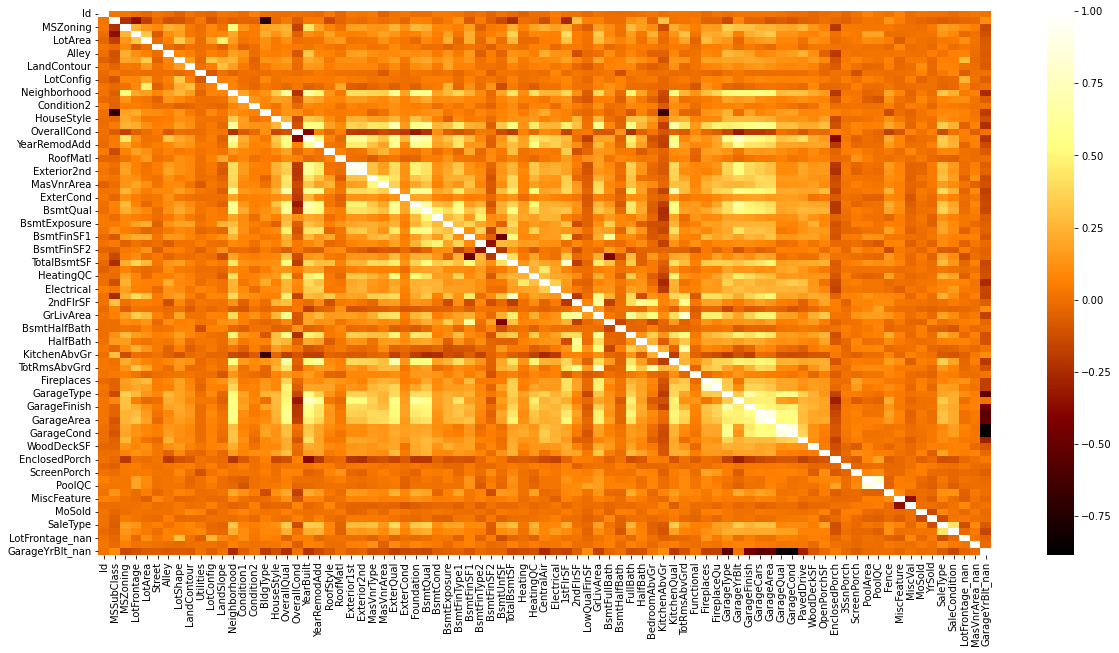

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap=plt.cm.afmhot)
plt.show()

In [15]:
# This function will return highly correlated feature
def correlation(data, threshold):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [16]:
correlated_features = correlation(x_train, 0.75)

In [17]:
print(correlated_features)
print(len(correlated_features))

{'1stFlrSF', 'GarageCond', 'GarageArea', 'GarageYrBlt_nan', 'FireplaceQu', 'Exterior2nd', 'PoolQC', 'TotRmsAbvGrd', 'GarageYrBlt'}
9


### Mutual Information 
It measures the dependancy between 2 variables
* For classification problem you can use mutual_info_classification

In [18]:
from sklearn.feature_selection import mutual_info_regression

In [19]:
mutual_info = mutual_info_regression(x_train, y_train)
mutual_info

array([0.        , 0.25957331, 0.09357385, 0.19965258, 0.15530394,
       0.        , 0.03684798, 0.06759491, 0.01534345, 0.01921002,
       0.01209038, 0.01371013, 0.48159556, 0.01476033, 0.        ,
       0.03741588, 0.09023805, 0.53501243, 0.10169833, 0.34967074,
       0.27293266, 0.01618011, 0.01855043, 0.12398954, 0.13662433,
       0.12066493, 0.0766918 , 0.29109038, 0.00692916, 0.19940923,
       0.3103484 , 0.04000871, 0.06961733, 0.14684869, 0.17069365,
       0.02538329, 0.02527333, 0.12313304, 0.3797693 , 0.02784851,
       0.14737632, 0.06361567, 0.06229607, 0.32813078, 0.17342754,
       0.01155565, 0.45147823, 0.        , 0.00527425, 0.26260048,
       0.05517411, 0.05942841, 0.00568756, 0.30323752, 0.18551654,
       0.        , 0.16223308, 0.21973197, 0.20168081, 0.2828733 ,
       0.26729038, 0.38198099, 0.36769825, 0.08431065, 0.08813142,
       0.03431386, 0.07619194, 0.16623957, 0.02993625, 0.        ,
       0.01982709, 0.        , 0.        , 0.03278468, 0.     

In [20]:
mutual_info = pd.Series(mutual_info, index=x_train.columns)

In [21]:
mutual_info.sort_values(ascending=False)

OverallQual     0.535012
Neighborhood    0.481596
GrLivArea       0.451478
GarageCars      0.381981
TotalBsmtSF     0.379769
                  ...   
MiscFeature     0.000000
MoSold          0.000000
Functional      0.000000
Street          0.000000
Id              0.000000
Length: 83, dtype: float64

<AxesSubplot:>

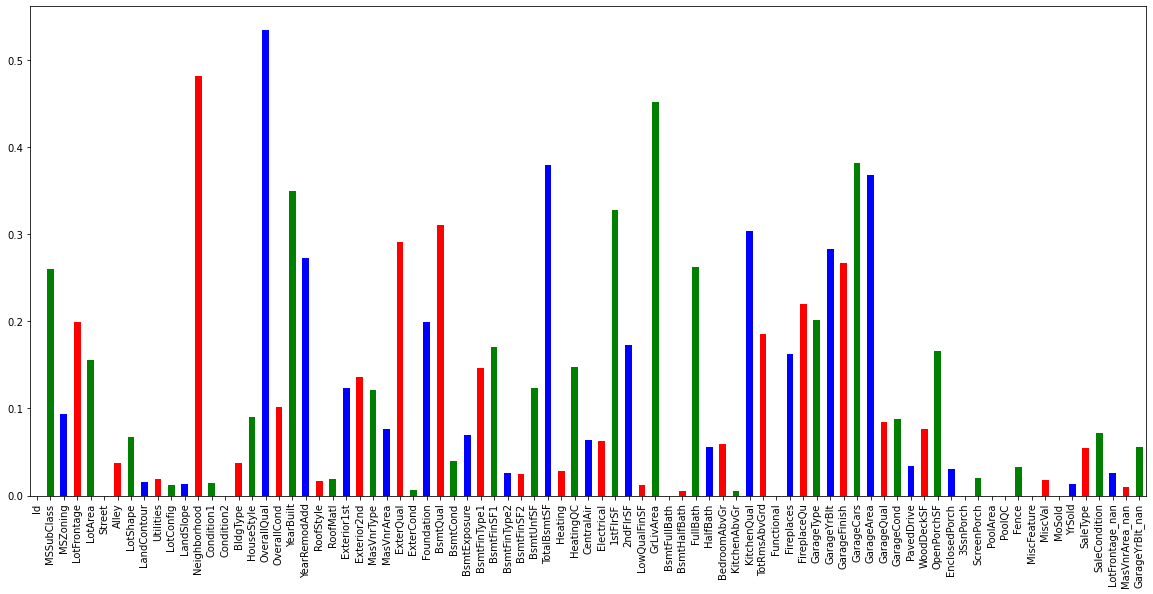

In [22]:
plt.figure(figsize=(20,9))
mutual_info.plot.bar(color=['red','green','blue'])

<AxesSubplot:>

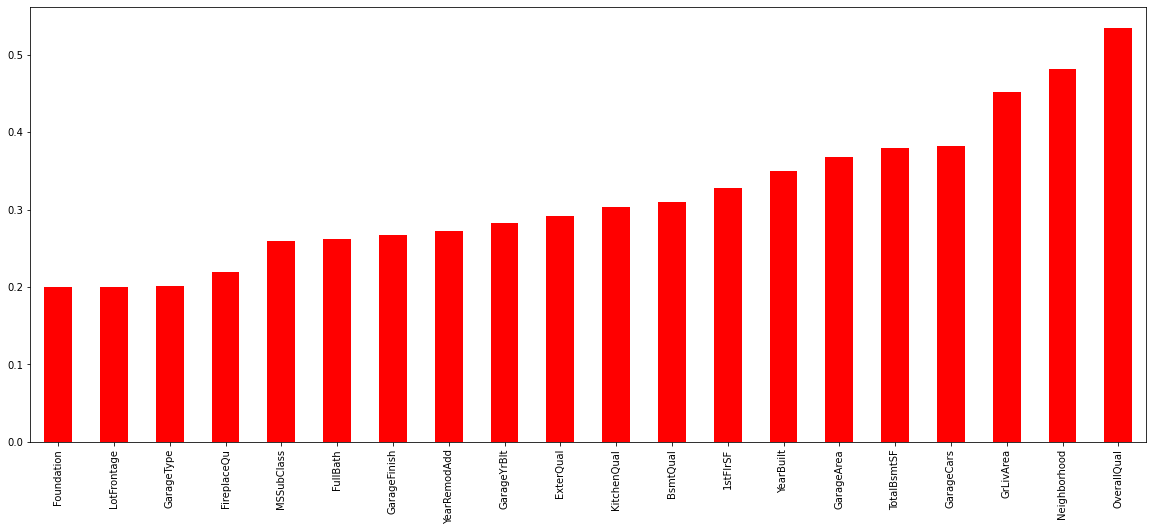

In [23]:
mutual_info.sort_values().tail(20).plot.bar(figsize=(20,8), color = 'red')

#### Select Feature Based on Numbers

In [24]:
from sklearn.feature_selection import SelectKBest

In [25]:
selected_features = SelectKBest(mutual_info_regression, k = 73)

In [26]:
selected_features.fit(x_train, y_train)

SelectKBest(k=73,
            score_func=<function mutual_info_regression at 0x000002A2B00A71F0>)

In [27]:
selected_features.get_support()

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True])

#### Select feature based on Percentile

In [28]:
from sklearn.feature_selection import SelectPercentile

In [29]:
selected_feature_percentile = SelectPercentile(mutual_info_regression, percentile=90)

In [30]:
selected_feature_percentile.fit(x_train, y_train)

SelectPercentile(percentile=90,
                 score_func=<function mutual_info_regression at 0x000002A2B00A71F0>)

In [31]:
sum(selected_feature_percentile.get_support())

74

In [32]:
x_train.columns[selected_feature_percentile.get_support()]

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'PoolArea',
       'Fence', 'Misc

##### I have Tried with reduced dimension i did not get any improvement in the model. The mean squared error have increased and the Ranking has not improved.